A signal, technically yet generally speaking, is a formal description of a
phenomenon evolving over time or space; by signal processing we denote
any manual or “mechanical” operation which modifies, analyzes or other-
wise manipulates the information contained in a signal.

Conceptually, it is important to note that signal processing operates on
an abstract representation of a physical quantity and not on the quantity itself.

A discrete-time signal is a complex-valued sequence. Remember that a se-
quence is defined as a complex-valued function of an integer index n, with
n ∈ ; as such, it is a two-sided, infinite collection of values.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import scipy
from scipy.signal import hilbert
from scipy import signal
from scipy.signal import butter, lfilter, hilbert, chirp
from scipy.fft import fft, fftfreq

import mne
from mne.preprocessing import ICA
import mne_connectivity
from mne_connectivity import spectral_connectivity_epochs
from mne_connectivity.viz import plot_sensors_connectivity

import ipywidgets as widgets
from ipywidgets import interactive

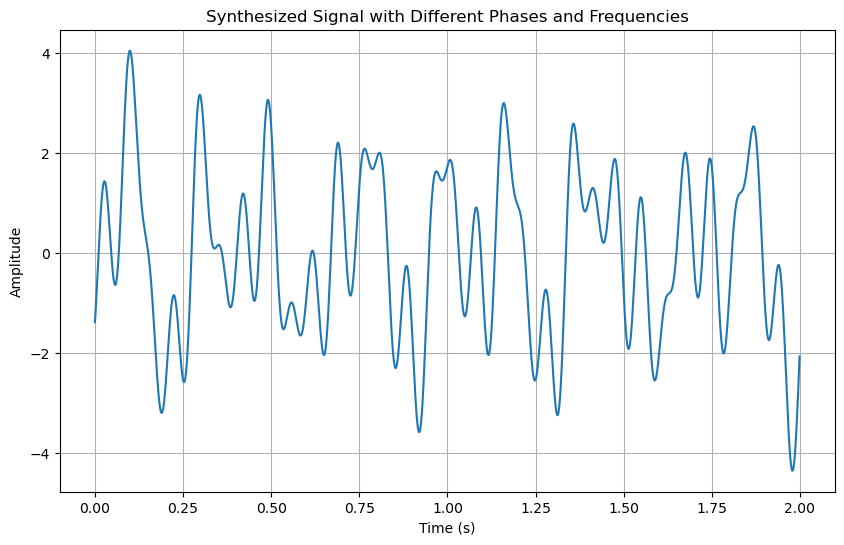

In [27]:


# Parameters
sampling_rate = 1000  # Sampling rate in Hz
duration = 2  # Duration of the signal in seconds
frequency_range = (0, 20)  # Frequency range in Hz
num_components = 5  # Number of sinusoidal components
phases = np.random.uniform(0, 2 * np.pi, num_components)  # Random phases for each component

# Time values
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# Generate the synthesized signal
synthesized_signal = np.zeros_like(t)
for i in range(num_components):
    frequency = np.random.uniform(*frequency_range)
    component = np.sin(2 * np.pi * frequency * t + phases[i])
    synthesized_signal += component

# Plot the synthesized signal
plt.figure(figsize=(10, 6))
plt.plot(t, synthesized_signal)
plt.title('Synthesized Signal with Different Phases and Frequencies')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

Hilbert Transform

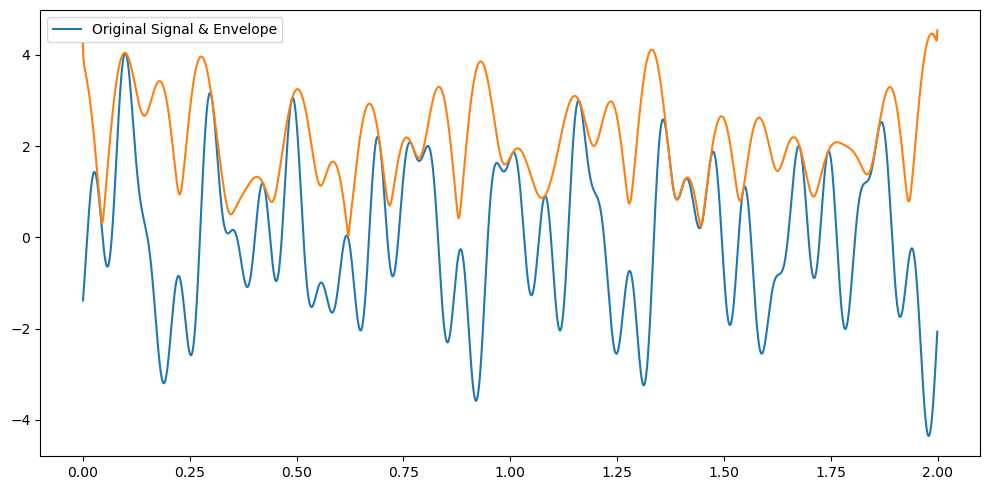

In [28]:
# Compute Hilbert Transform
analytic_signal = hilbert(synthesized_signal)

# Compute Envelope of the signal
envelope = np.abs(analytic_signal)


# Plot the original signal and its envelope
plt.figure(figsize=(10, 5))
plt.subplot(1, 1, 1)
plt.plot(t, synthesized_signal, label='Original Signal & Envelope')
plt.legend()
plt.subplot(1, 1, 1)
plt.plot(t, envelope)
plt.tight_layout()
plt.show()


Fourier Transform

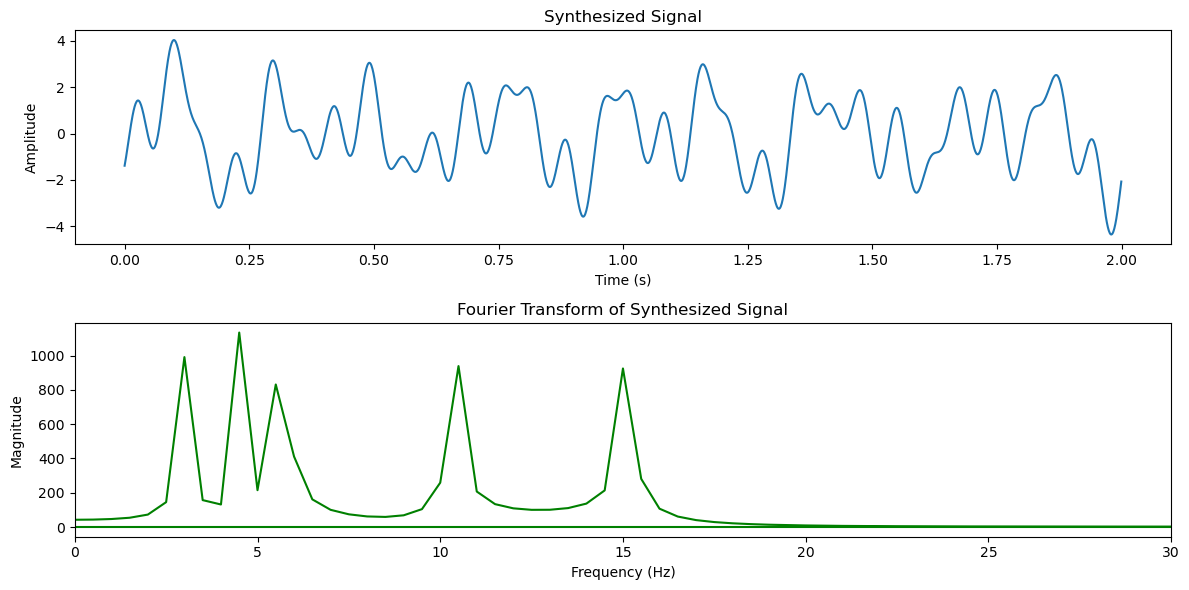

In [29]:
# Compute the Fourier Transform
fourier_transform = np.fft.fft(synthesized_signal)
frequencies = np.fft.fftfreq(len(t), 1 / sampling_rate)

# Plot the original signal and its Fourier Transform
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, synthesized_signal)
plt.title('Synthesized Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(frequencies, np.abs(fourier_transform), color='Green')
plt.title('Fourier Transform of Synthesized Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(0, 30)  # Limit the x-axis range for better visibility

plt.tight_layout()
plt.show()

Frequency Filter

In [30]:
def butter_bandpass(lowcut, highcut, fs, order):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [31]:
lowcut = 7.5
highcut = 12
fsignal = butter_bandpass_filter(synthesized_signal, lowcut, highcut, sampling_rate, order = 4)

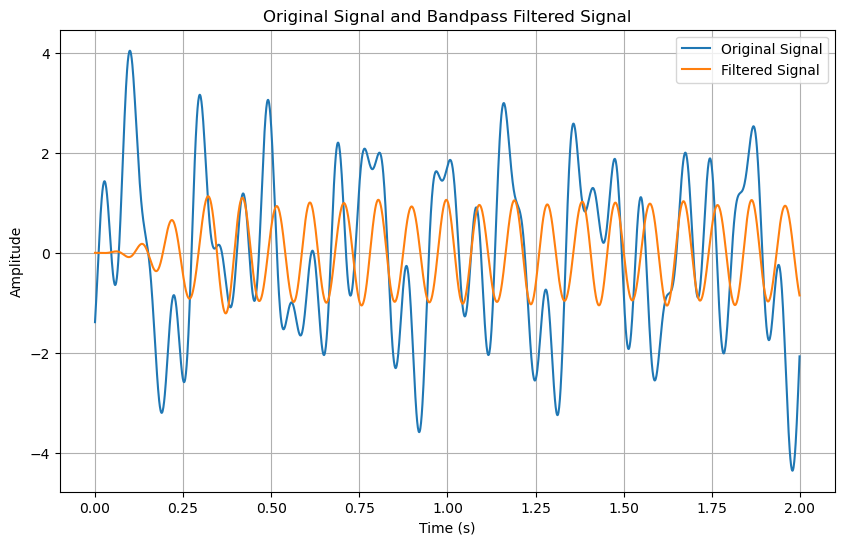

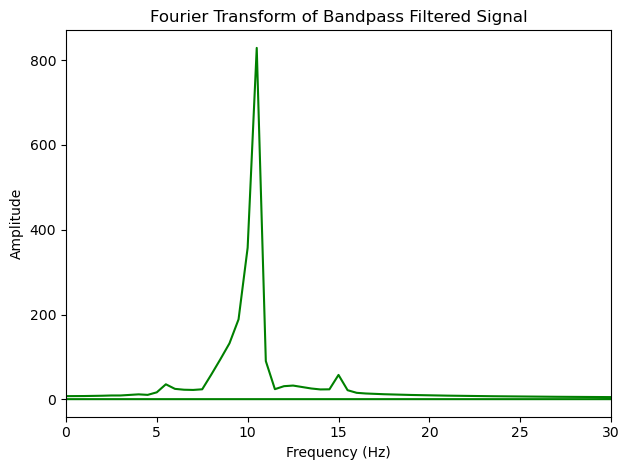

In [32]:
# Plot the original and filtered signals
plt.figure(figsize=(10, 6))
plt.plot(t, synthesized_signal, label='Original Signal')
plt.plot(t, fsignal, label='Filtered Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Original Signal and Bandpass Filtered Signal')
plt.grid(True)
plt.show()

# Compute the Fourier Transform
fourier_transform = np.fft.fft(fsignal)
frequencies = np.fft.fftfreq(len(t), 1 / sampling_rate)

# Plot the original signal and its Fourier Transform
plt.plot(frequencies, np.abs(fourier_transform), color='Green')
plt.title('Fourier Transform of Bandpass Filtered Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xlim(0, 30)  # Limit the x-axis range for better visibility

plt.tight_layout()
plt.show()

interactive(children=(IntSlider(value=4, description='Filter Order', max=10, min=1), Output(layout=Layout(heig…

<Figure size 640x480 with 0 Axes>

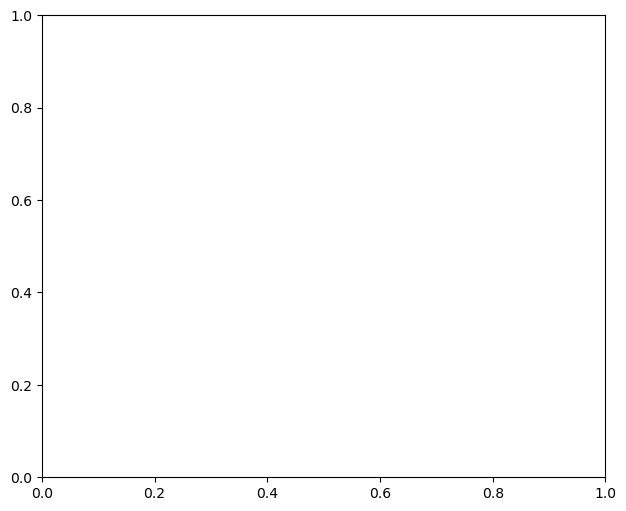

In [37]:
# Create interactive widget for adjusting filter order
def plot_filtered_signal(order=4):

    fsignal = butter_bandpass_filter(synthesized_signal, lowcut, highcut, sampling_rate, order = order)
    
    # Clear previous plots
    plt.clf()
    
    # Plot the original and filtered signals
    plt.figure(figsize=(16, 6))
    plt.subplot(1, 2, 1)
    plt.plot(t, synthesized_signal, label='Original Signal')
    plt.plot(t, fsignal, label='Filtered Signal')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.title('Original Signal and Bandpass Filtered Signal')
    plt.grid(True)

    # Plot the Fourier Transform
    fourier_transform = np.fft.fft(fsignal)
    frequencies = np.fft.fftfreq(len(t), 1 / sampling_rate)
    plt.subplot(1, 2, 2)
    plt.plot(frequencies, np.abs(fourier_transform), color='Green')
    plt.title('Fourier Transform of Bandpass Filtered Signal')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.xlim(0, 30)  # Limit the x-axis range for better visibility
    
    plt.tight_layout()
    plt.show()

# Create interactive widget
order_slider = widgets.IntSlider(value=4, min=1, max=10, step=1, description='Filter Order')
interactive_plot = interactive(plot_filtered_signal, order=order_slider)

# Display the interactive widget
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot


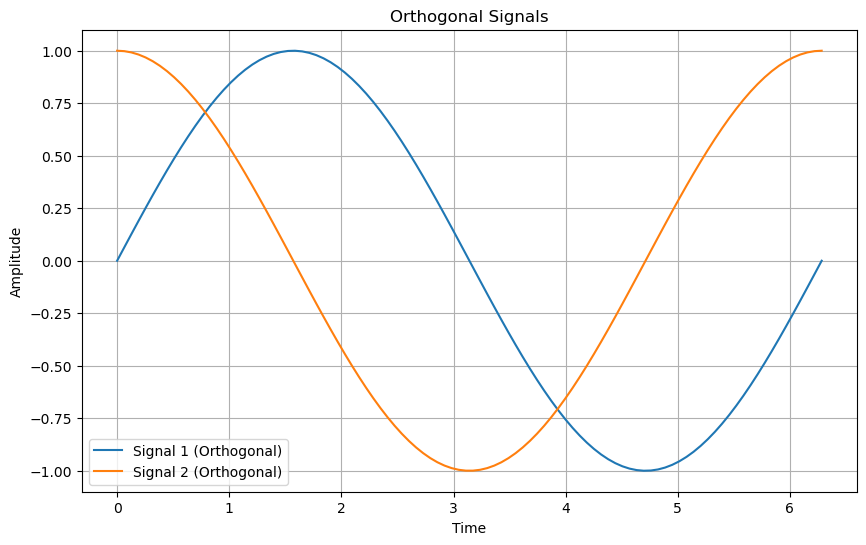

Dot Product (Inner Product): -0.0


In [34]:

# Generate time values
t = np.linspace(0, 2 * np.pi, 100)

# Generate two orthogonal sinusoidal signals
signal1 = np.sin(t)
signal2 = np.cos(t)

# Compute the dot product (inner product)
dot_product = np.dot(signal1, signal2)

# Plot the orthogonal signals
plt.figure(figsize=(10, 6))
plt.plot(t, signal1, label='Signal 1 (Orthogonal)')
plt.plot(t, signal2, label='Signal 2 (Orthogonal)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Orthogonal Signals')
plt.legend()
plt.grid(True)
plt.show()

# Print the dot product (inner product)
print(f"Dot Product (Inner Product): {round(dot_product, 10)}")


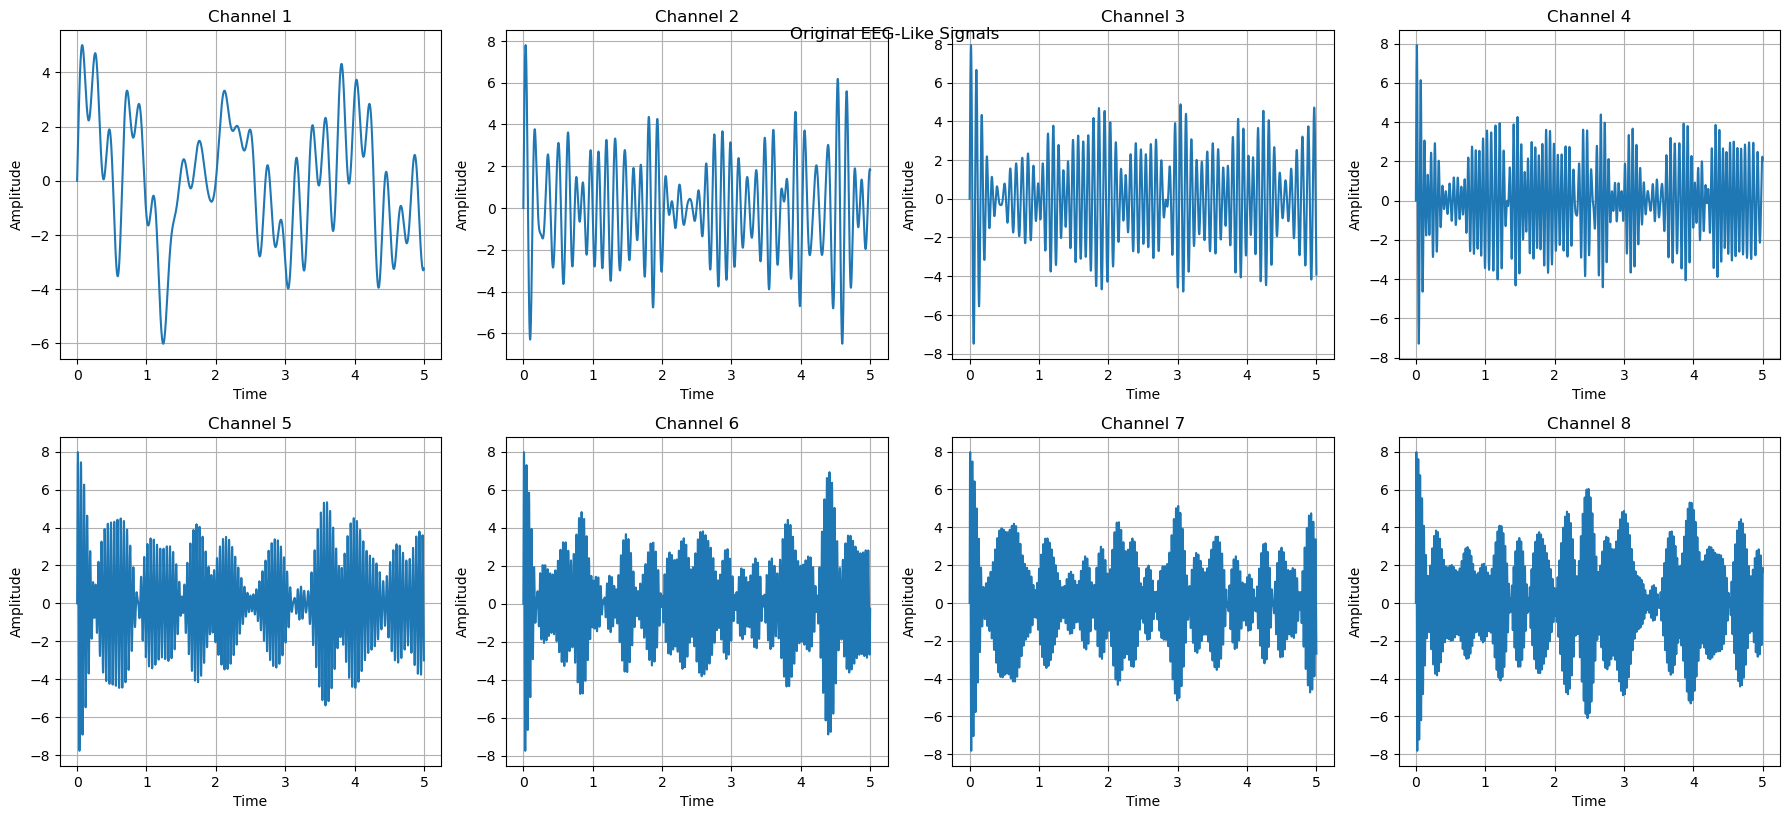

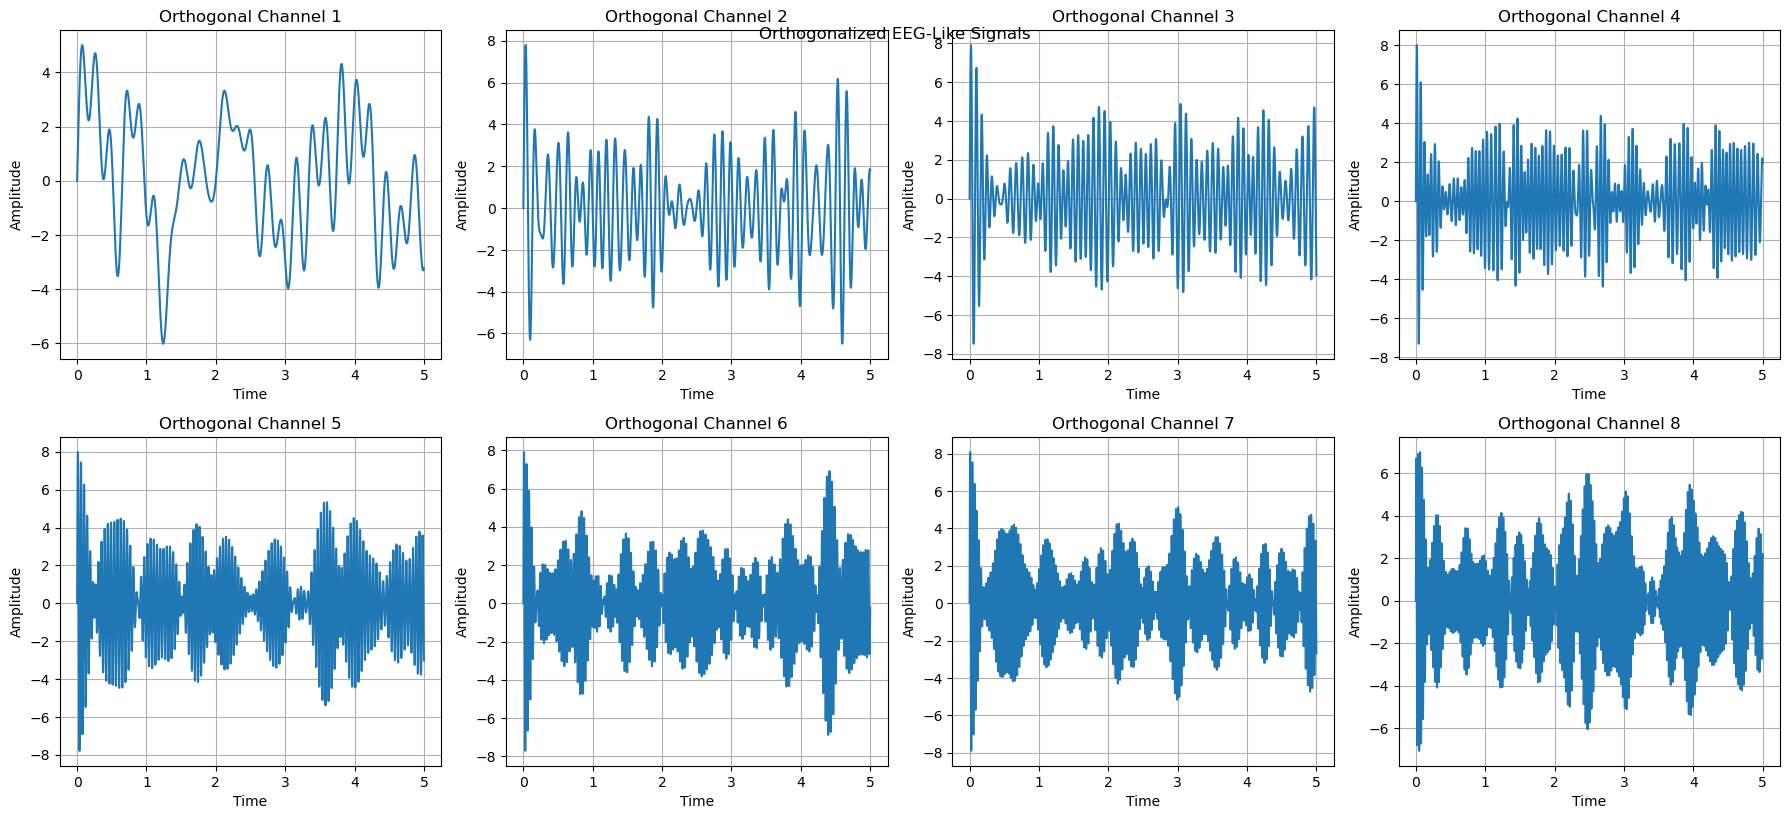

In [10]:
# Parameters
num_channels = 8
sampling_rate = 1000  # Sampling rate in Hz
duration = 5  # Duration of the signal in seconds
frequency_ranges = [(0, 5), (5, 10), (10, 15), (15, 20),
                    (20, 25), (25, 30), (30, 35), (35, 40),
                    (40, 45), (0, 10), (10, 20), (20, 30),
                    (30, 40), (0, 20), (20, 40), (0, 45)]

# Generate time values
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# Generate EEG-like signals for each channel
eeg_channels = []
for freq_range in frequency_ranges:
    freq = np.random.uniform(*freq_range, num_channels)
    channel = np.sum([np.sin(2 * np.pi * f * t) for f in freq], axis=0)
    eeg_channels.append(channel)

# Stack EEG channels vertically to create a matrix
eeg_signal = np.vstack(eeg_channels)



# Perform Gram-Schmidt orthogonalization
def gram_schmidt(vectors):
    basis = []
    for v in vectors:
        for b in basis:
            v -= np.dot(v, b) / np.dot(b, b) * b
        basis.append(v)
    return basis

orthogonal_basis = gram_schmidt(eeg_signal)


# Plot the original EEG-like signals
plt.figure(figsize=(18, 16))
for i in range(num_channels):
    plt.subplot(4, 4, i + 1)
    plt.plot(t, eeg_channels[i])
    plt.title(f'Channel {i + 1}')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.grid(True)

plt.tight_layout()
plt.suptitle('Original EEG-Like Signals')
plt.show()

# Plot the orthogonalized EEG-like signals
plt.figure(figsize=(18, 16))
for i in range(num_channels):
    plt.subplot(4, 4, i + 1)
    plt.plot(t, orthogonal_basis[i])
    plt.title(f'Orthogonal Channel {i + 1}')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.grid(True)

plt.tight_layout()
plt.suptitle('Orthogonalized EEG-Like Signals')
plt.show()


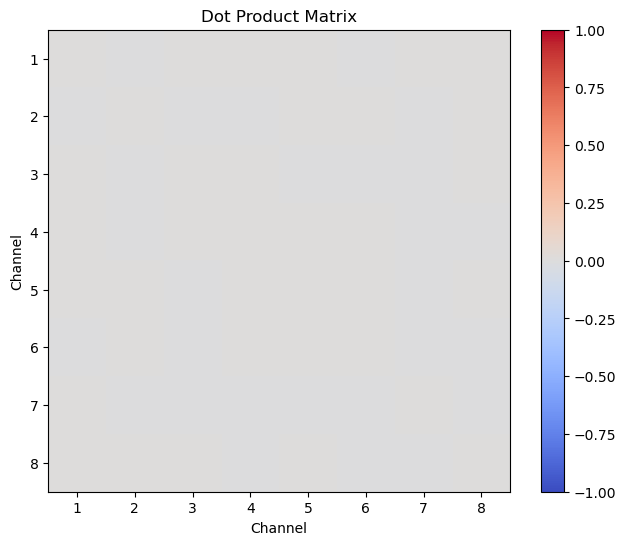

In [11]:
# Validate orthogonality by calculating dot products between orthogonalized channels
dot_products = np.zeros((num_channels, num_channels))
for i in range(num_channels):
    for j in range(i + 1, num_channels):
        dot_product = np.dot(orthogonal_basis[i], orthogonal_basis[j])
        dot_products[i, j] = dot_product
        dot_products[j, i] = dot_product

# Plot the dot product matrix
plt.figure(figsize=(8, 6))
plt.imshow(dot_products, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar()
plt.title('Dot Product Matrix')
plt.xlabel('Channel')
plt.ylabel('Channel')
plt.xticks(range(num_channels), range(1, num_channels + 1))
plt.yticks(range(num_channels), range(1, num_channels + 1))
plt.show()


E/MEG Data Analysis

In [12]:
eeg_file = '/home/vivek/Downloads/MD5E-s31473920--a4aa13370458a970886967bd6dc6d672.edf'
raw = mne.io.read_raw_edf(eeg_file, preload=True)

Extracting EDF parameters from /home/vivek/Downloads/MD5E-s31473920--a4aa13370458a970886967bd6dc6d672.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 245759  =      0.000 ...   239.999 secs...


In [13]:
# High-pass filter the data
raw = raw.filter(0.5, 45)


# Apply ICA to remove artifacts
ica = ICA(n_components=20, random_state=97)
ica.fit(raw)
raw_corrected = raw.copy()
raw_corrected = ica.apply(raw_corrected)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 6759 samples (6.601 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 64 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.6s finished


Selecting by number: 20 components
Fitting ICA took 14.5s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 64 PCA components


In [14]:
# Epoch the data into 5-second bins
epoch_duration = 5  # in seconds
events = mne.make_fixed_length_events(raw_corrected, duration=epoch_duration)
epochs = mne.Epochs(raw_corrected, events, tmin=0, tmax=epoch_duration, baseline=None, preload=True)

Not setting metadata
48 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 48 events and 5121 original time points ...
1 bad epochs dropped


    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...


/tmp/ipykernel_13616/837911492.py:2: RuntimeWarning: in version 1.5, the default behavior of Spectrum.plot() will change so that bad channels will be shown by default. To keep the old default behavior (and silence this warning), explicitly pass `picks='data', exclude='bads'`.
  epochs.compute_psd(fmin=1, fmax=45).plot()
/tmp/ipykernel_13616/837911492.py:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  epochs.compute_psd(fmin=1, fmax=45).plot()
/home/vivek/anaconda3/lib/python3.9/site-packages/mne/viz/utils.py:151: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


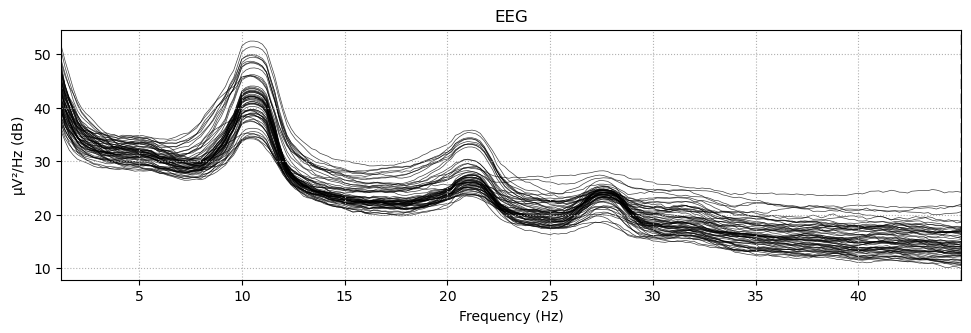

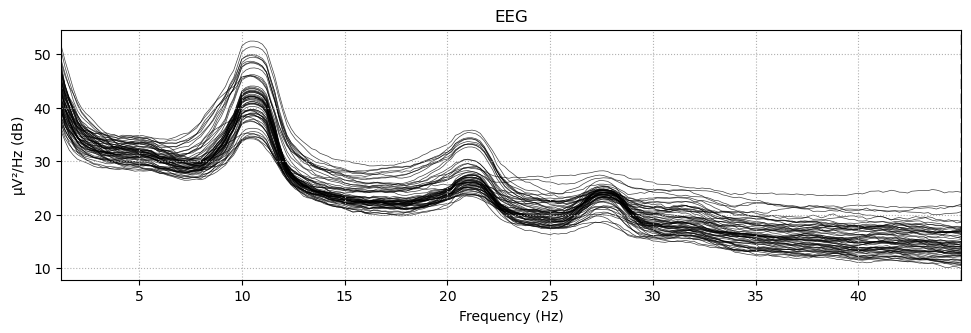

In [15]:
# Compute and visualize PSD for each channel
epochs.compute_psd(fmin=1, fmax=45).plot()

In [16]:
epochs.get_data().shape

(47, 64, 5121)

In [17]:
corr    = np.zeros([len(epochs.get_data()), 64, 64])
pvalues = np.zeros([len(epochs.get_data()), 64, 64])
for o in range(0, len(epochs.get_data())):
    a = epochs.get_data()[o]
    for t in range(0, 64):
        y = a[t]
        for p in range(0, 64):
            x = a[p]
            cor, pval = scipy.stats.pearsonr(x, y)
            corr[o, t, p] = (cor)
            pvalues[o, t, p] = (pval)

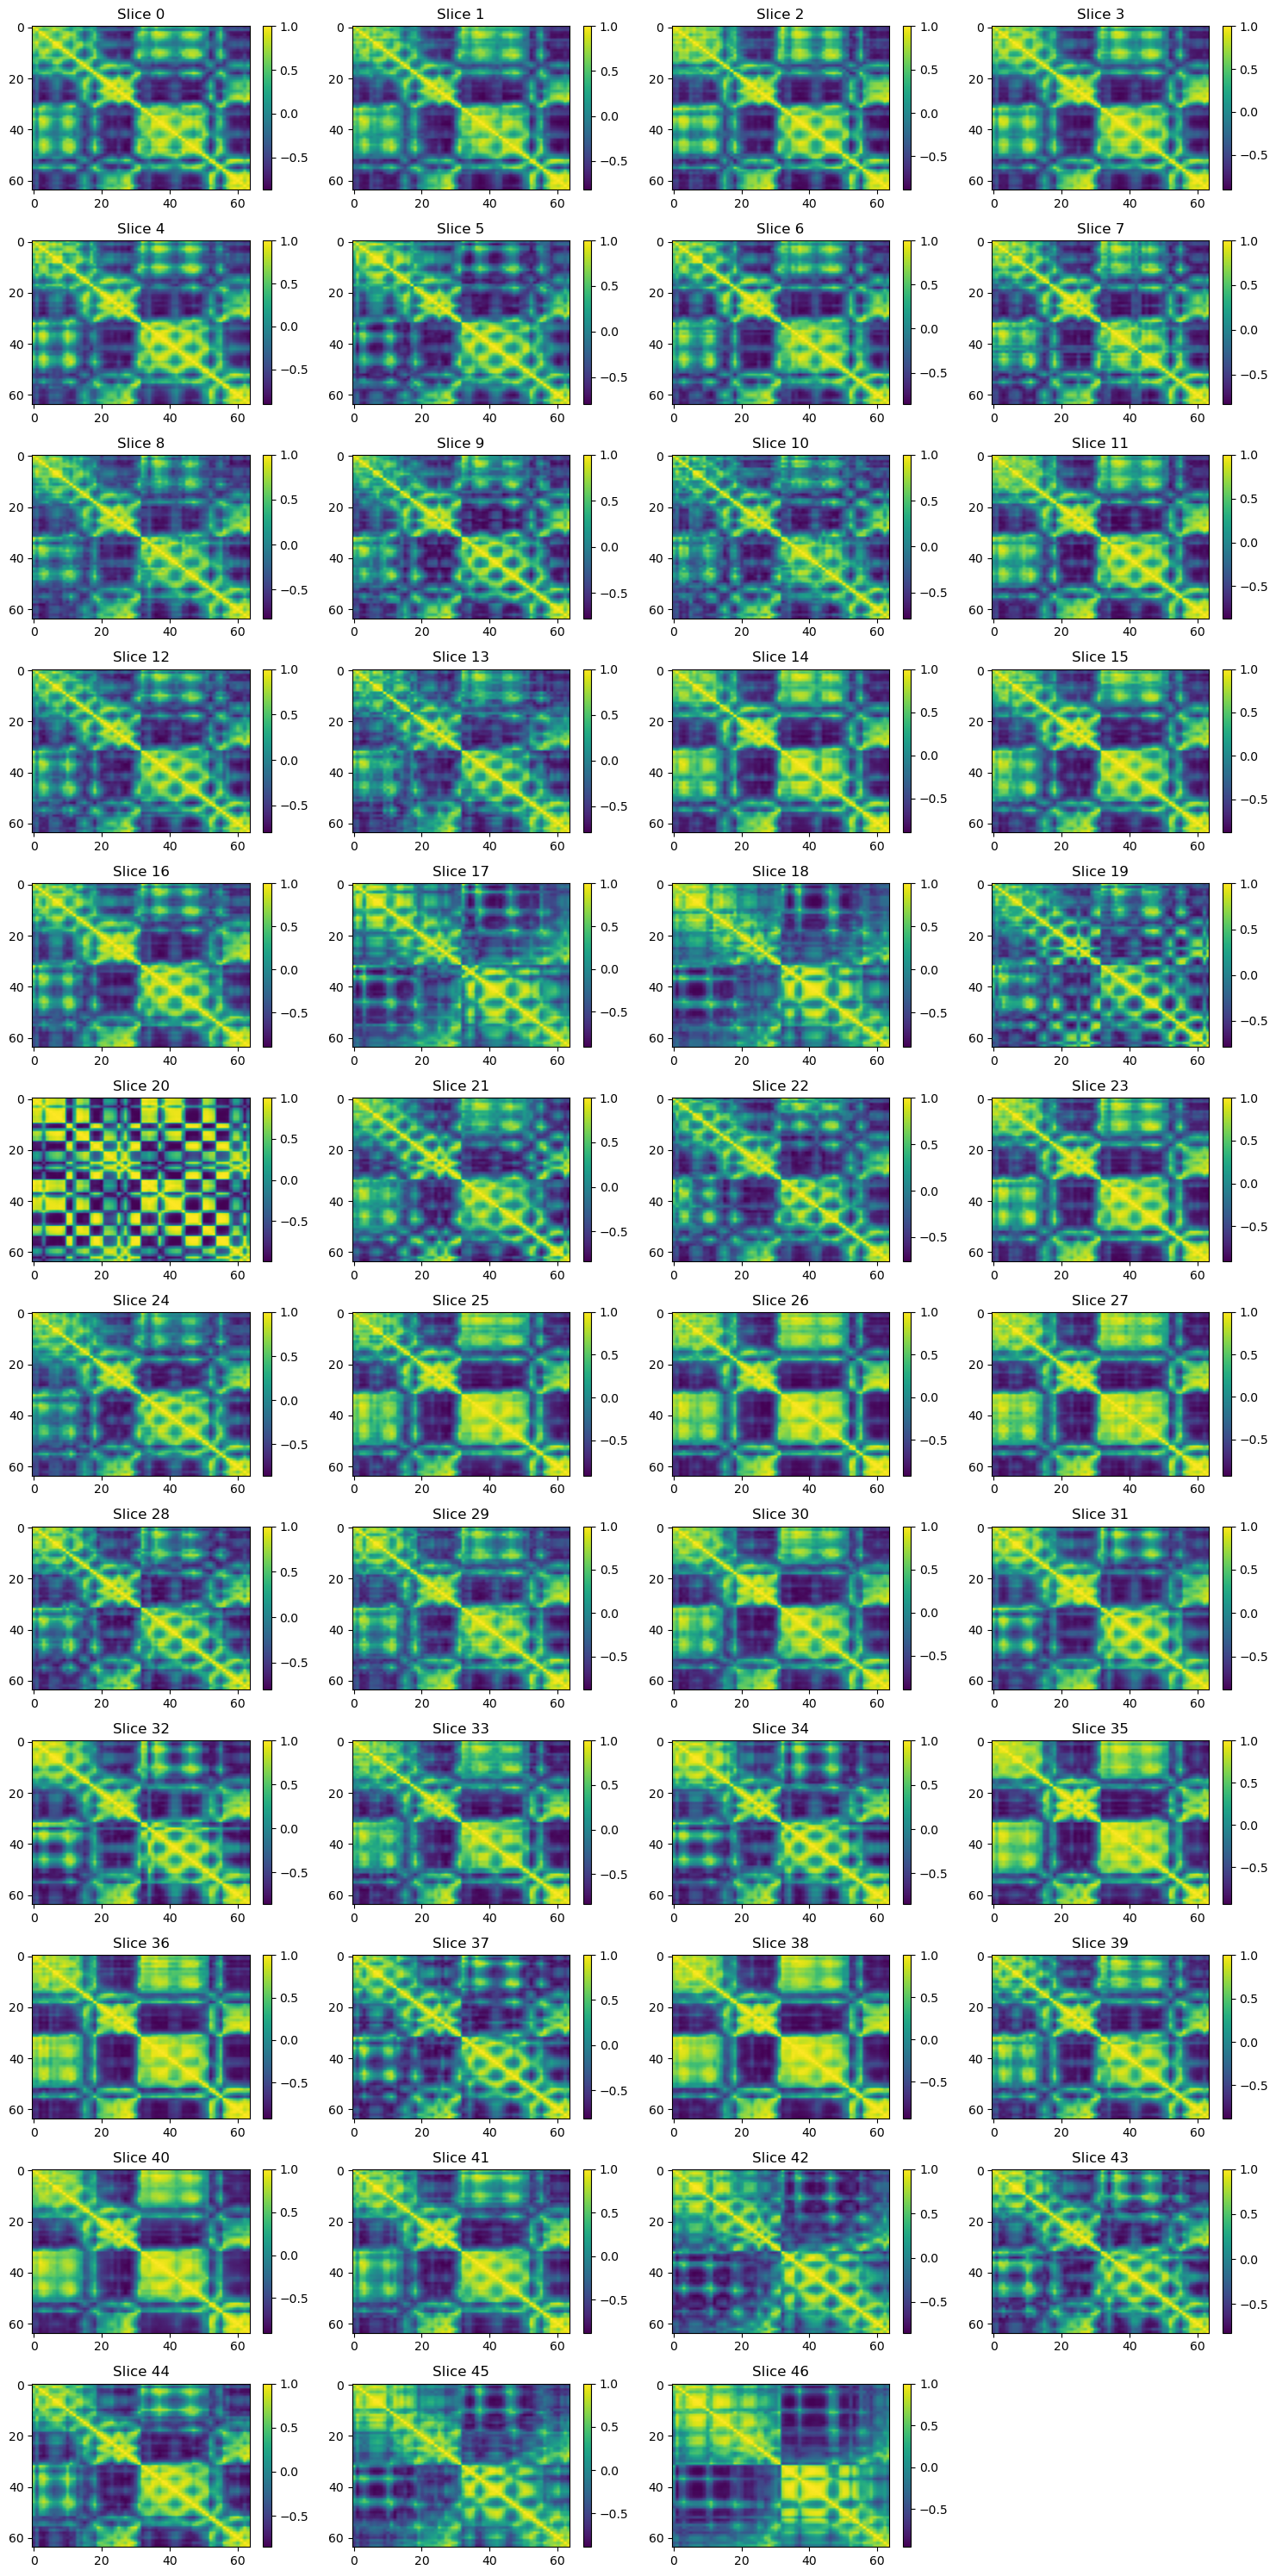

In [18]:
num_slices = corr.shape[0]
num_cols = 4
num_rows = int(np.ceil(num_slices / num_cols))

plt.figure(figsize=(15, 30))
gs = GridSpec(num_rows, num_cols, figure=plt.gcf())

for i in range(num_slices):
    ax = plt.subplot(gs[i])
    plt.imshow(corr[i], cmap='viridis', aspect='auto', origin='upper')
    plt.title(f'Slice {i}')
    plt.colorbar()

plt.tight_layout()
plt.show()

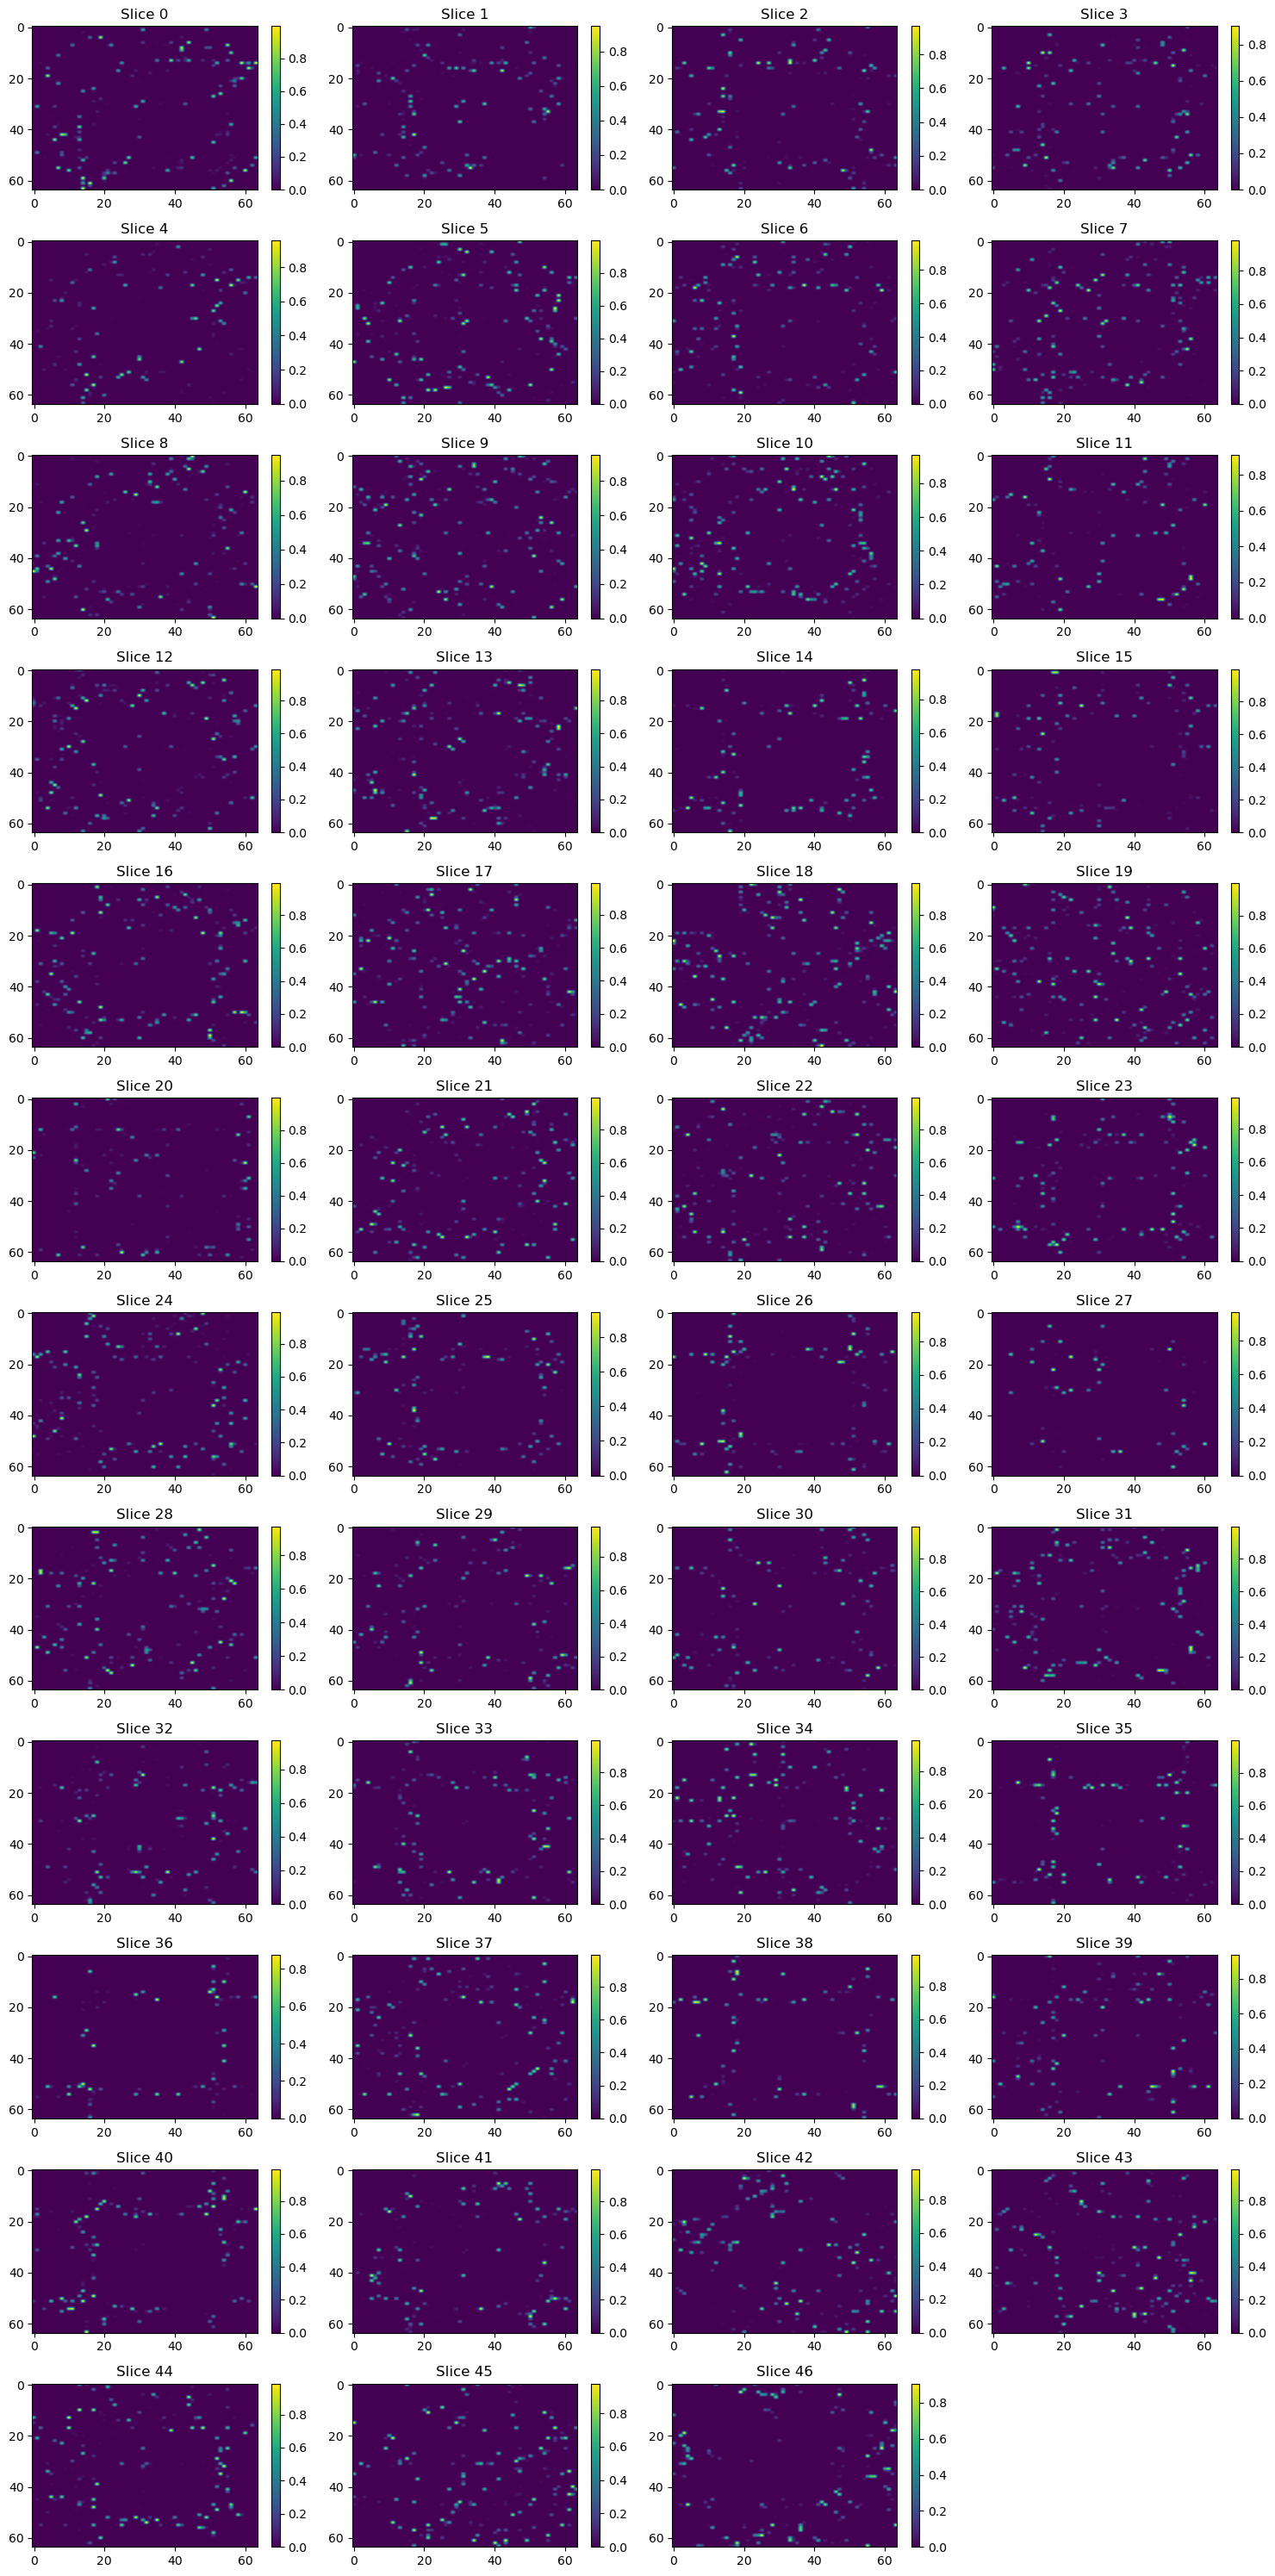

In [19]:
num_slices = pvalues.shape[0]
num_cols = 4
num_rows = int(np.ceil(num_slices / num_cols))

plt.figure(figsize=(15, 30))
gs = GridSpec(num_rows, num_cols, figure=plt.gcf())

for i in range(num_slices):
    ax = plt.subplot(gs[i])
    plt.imshow(pvalues[i], cmap='viridis', aspect='auto', origin='upper')
    plt.title(f'Slice {i}')
    plt.colorbar()

plt.tight_layout()
plt.show()